# Gaussian Mixtures

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

genero los datasets para realizar las pruebas

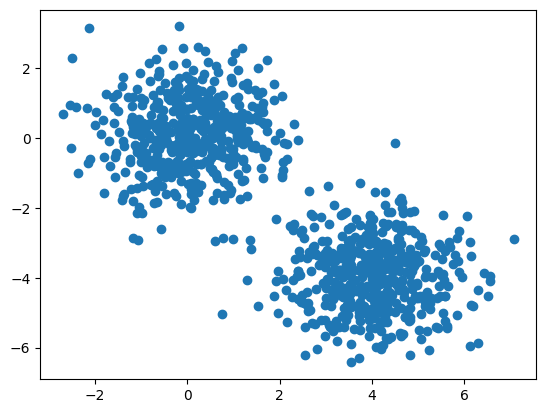

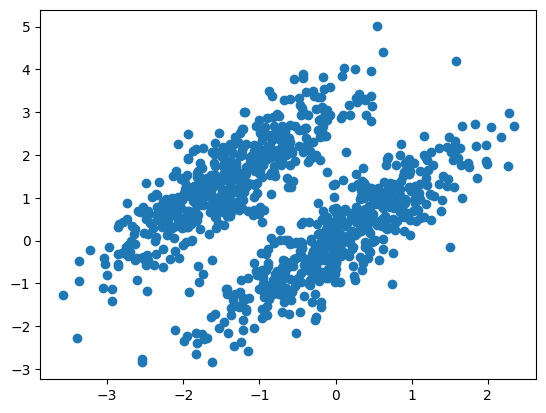

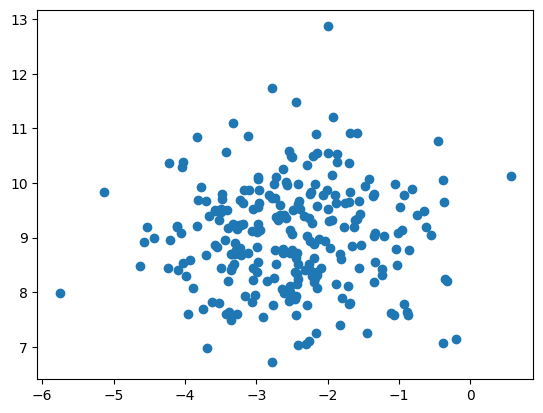

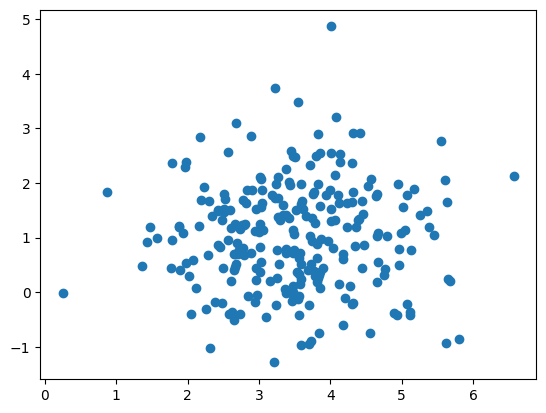

In [2]:
from sklearn.datasets import make_blobs


X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
plt.scatter(X1[:,0],X1[:,1])
plt.show()

X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
plt.scatter(X1[:,0],X1[:,1])
plt.show()

X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
plt.scatter(X2[:,0],X2[:,1])
plt.show()

X2 = X2 + [6, -8]
plt.scatter(X2[:,0],X2[:,1])
plt.show()

X = np.r_[X1, X2]
y = np.r_[y1, y2]

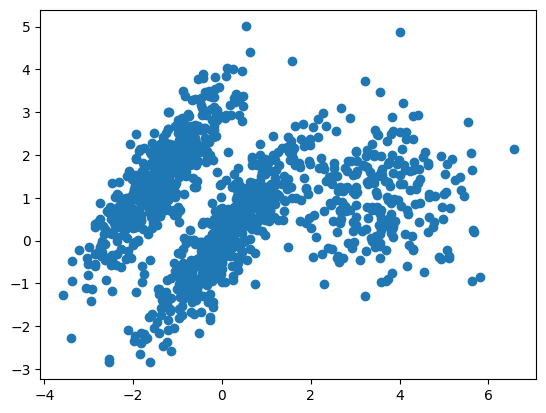

In [3]:
plt.scatter(X[:,0],X[:,1])

In [4]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10)# utiliza un algoritmo llamada Expectation Maximization (EM), n_init=1 por default
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [ ]:
#acceder a los pesos
gm.weights_

array([0.40004337, 0.20954915, 0.39040749])

In [ ]:
#acceder a la media de las distribuciones
gm.means_

array([[-1.40765148,  1.42718339],
       [ 3.40011393,  1.05931676],
       [ 0.0516183 ,  0.07550754]])

In [ ]:
#acceder a la matriz de covarianza de las distribuciones
gm.covariances_

array([[[ 0.63477114,  0.72969538],
        [ 0.72969538,  1.16085164]],

       [[ 1.14631283, -0.03285453],
        [-0.03285453,  0.95505142]],

       [[ 0.68856426,  0.79633822],
        [ 0.79633822,  1.21252023]]])

Para ver si el algoritmo converge podemos utilizar el atributo siguiente

In [ ]:
gm.converged_

True

In [ ]:
gm.n_iter_

4

Podemos estimar la probabilidad de pertener a un cluster (soft clustering) o directamente que nos de el cluster más probable (hard clustering)

In [ ]:
#hard clustering
display(gm.predict(X))
#soft clustering
display(gm.predict_proba(X))

array([2, 2, 0, ..., 1, 1, 1])

array([[6.73632768e-07, 2.30956994e-02, 9.76903627e-01],
       [6.72738827e-04, 1.63176388e-02, 9.83009622e-01],
       [9.99922105e-01, 1.96800317e-06, 7.59268139e-05],
       ...,
       [2.09167854e-26, 9.99999561e-01, 4.38851876e-07],
       [1.41536116e-41, 1.00000000e+00, 5.40181989e-16],
       [7.72772760e-41, 1.00000000e+00, 2.38611270e-15]])

GMM es un modelo generativo, por lo que podríamos pedir que nos sample nuevas muestras

In [ ]:
X_new, y_new = gm.sample(6)
display(X_new)
display(y_new)

array([[-0.96219224,  1.85482356],
       [-0.35766921,  3.7260991 ],
       [-2.08579037,  0.52854695],
       [ 2.95432687,  0.07495171],
       [-0.0590108 ,  0.3165152 ],
       [-0.53742648, -0.49758133]])

array([0, 0, 0, 1, 2, 2])

También es posible obtener el  logaritmo de la PDF (función de densidad de probabilidad) en cualquier posición:



In [ ]:
gm.score_samples(X)

array([-2.60806011, -3.57076496, -3.3306168 , ..., -3.51374548,
       -4.39785401, -3.80701199])

In [ ]:
from matplotlib.colors import LogNorm


def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

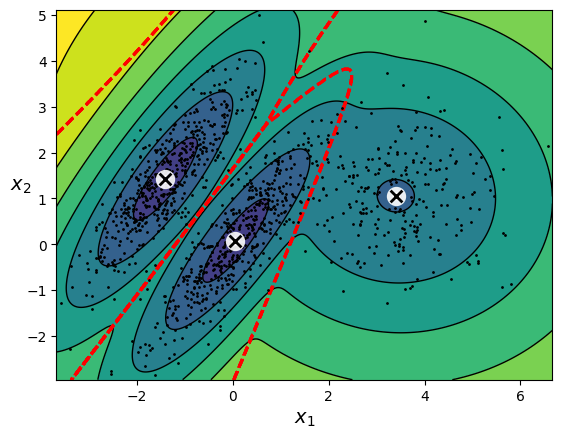

In [ ]:
plot_gaussian_mixture(gm, X)


Con una alta dimensionalidad al algoritmo le puede costar converger, una forma de ayudarlo a converger es restrigir los grados de libertad del mismo fijando la estructura de la matriz de covarianza con la variable `covariance_type`. Este hiperpárametro puede toma los valores:

- 'full': cada componente tiene su propia matriz de covarianza general. Complejidad: $O(kmn^{2}+kn^2)$

- 'tied': todas las componentes tienen la misma matriz de covarianza general, es decir, todas son elipsoides con paralelos de distintos tamaños. Complejidad: $O(kmn^{2}+kn^2)$

- 'diag': cada componente tien su propia matriz de covarianza diagonal. Complejidad: $O(kmn)$

- 'spherical': cada componente  tiene su propia varianza. Complejidad: $O(kmn)$

Text(0.5, 1.0, "covariance_type='full'")

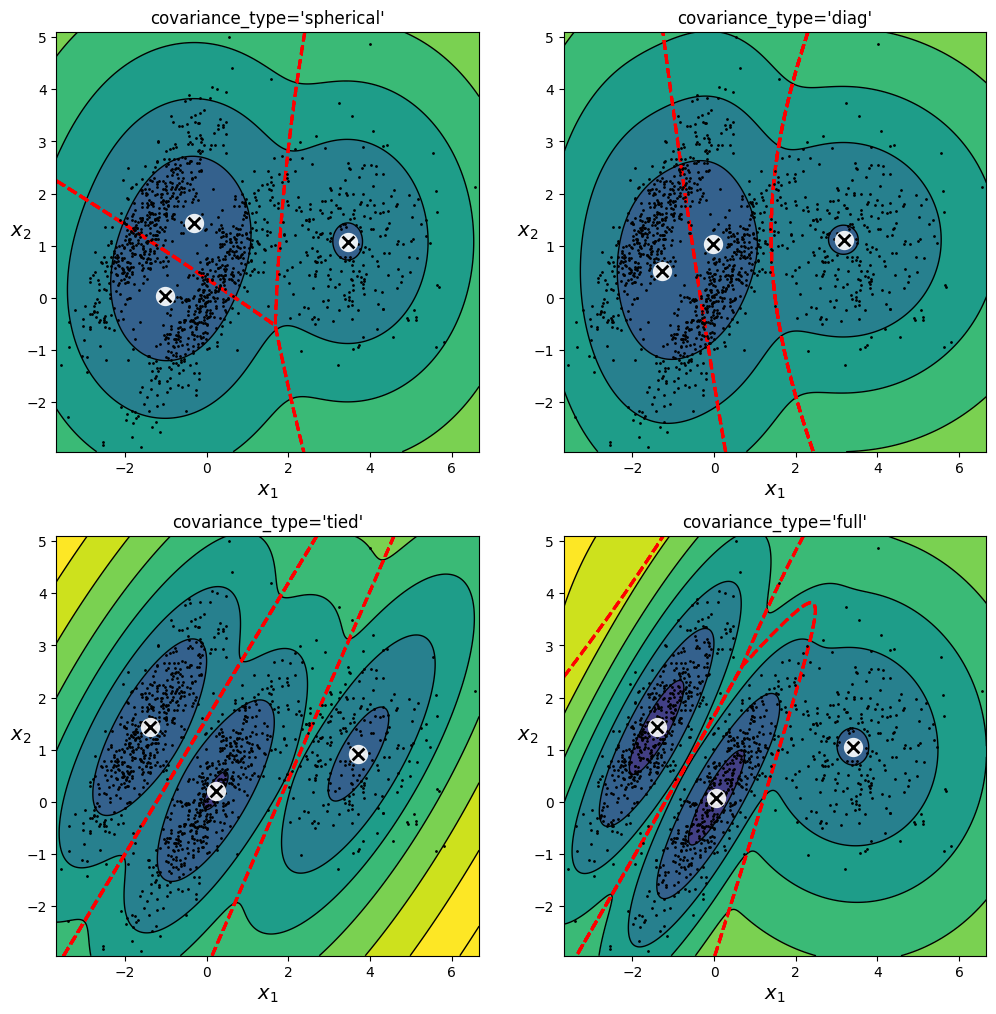

In [ ]:

plt.figure(figsize=(12,12))
plt.subplot(221)
gm = GaussianMixture(n_components=3, n_init=10, covariance_type='spherical')
gm.fit(X)
plot_gaussian_mixture(gm, X)
plt.title("covariance_type='spherical'")

plt.subplot(222)
gm = GaussianMixture(n_components=3, n_init=10, covariance_type='diag')
gm.fit(X)
plot_gaussian_mixture(gm, X)
plt.title("covariance_type='diag'")

plt.subplot(223)
gm = GaussianMixture(n_components=3, n_init=10, covariance_type='tied')
gm.fit(X)
plot_gaussian_mixture(gm, X)
plt.title("covariance_type='tied'")

plt.subplot(224)
gm = GaussianMixture(n_components=3, n_init=10, covariance_type='full')
gm.fit(X)
plot_gaussian_mixture(gm, X)
plt.title("covariance_type='full'")

# Usando GMM para detección de anomalias

In [ ]:
X_new, y_new = gm.sample(100000)

In [ ]:
densities = gm.score_samples(X_new)
densities_threshold = np.percentile(densities,5)
print(densities_threshold)

-5.277487615922221


In [ ]:
densities = gm.score_samples(X)
anomalies = X[densities < densities_threshold]

(-2.9486047751812894, 5.1)

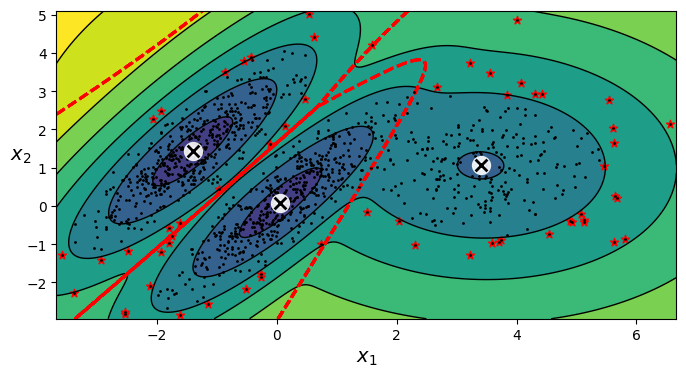

In [ ]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(top=5.1)

# Número de clúster óptimo
En Gaussian Mixture no se utilizan los criterios silhouette o inercia, ya qué estos no son confiables si los clusters no son esféricos o tienen diferentes tamaños.

Se utilizan:
- Criterio de información bayesiano: $BIC = \log(m)p-2log(\hat{L})$
- Criterio de información de Akaike: $AIC = 2p-2log(\hat{L})$

Por lo general los dos seleccionan el mismo modelo, de lo contrario $BIC$ seleccionara un modelo más simple (menos parámetros) y $AIC$ un modelo que ajuste mejor los parámetros.

In [ ]:
# las metricas están almacenadas en los atributos del modelo ajustado
print(f"BIC: {gm.bic(X):2f}")
print(f"AIC: {gm.aic(X):2f}")

BIC: 8189.733705
AIC: 8102.508425


Calcular de forma manual los criterios

In [ ]:
n_clusters = 3
n_dims = 2
n_params_for_weights = n_clusters - 1
n_params_for_means = n_clusters * n_dims
n_params_for_covariance = n_clusters * n_dims * (n_dims + 1) // 2
n_params = n_params_for_weights + n_params_for_means + n_params_for_covariance
max_log_likelihood = gm.score(X) * len(X) # log(L^)
bic = np.log(len(X)) * n_params - 2 * max_log_likelihood
#aic = 

In [ ]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X)
             for k in range(1, 11)]

bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

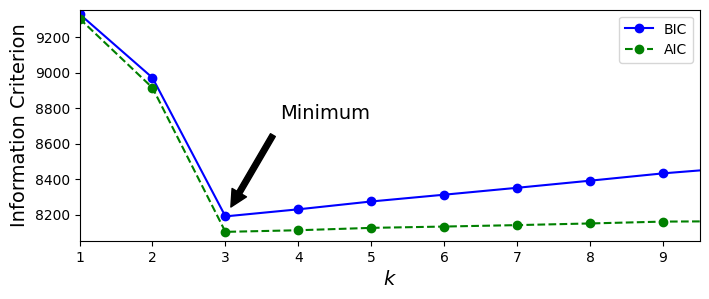

In [ ]:
plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])
plt.annotate('Minimum',
             xy=(3, bics[2]),
             xytext=(0.35, 0.6),
             textcoords='figure fraction',
             fontsize=14,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.legend()